In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,mean_squared_log_error
import cv2
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
train=pd.read_csv('/content/drive/My Drive/Attrition/Dataset/Train.csv')
test=pd.read_csv('/content/drive/My Drive/Attrition/Dataset/Test.csv')
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [25]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [37]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

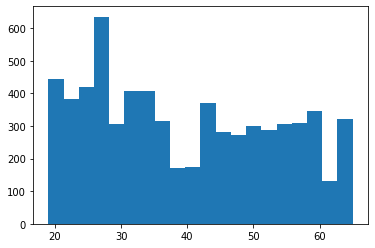

In [6]:
plt.hist(train['Age'],bins=20)
plt.show()

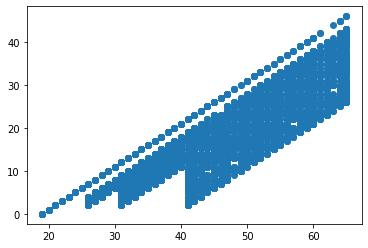

In [38]:
plt.scatter(train['Age'],train['Time_of_service'])
plt.show()

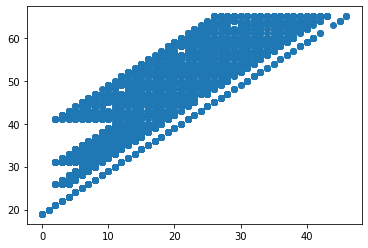

In [39]:
plt.scatter(train['Time_of_service'],train['Age'])
plt.show()

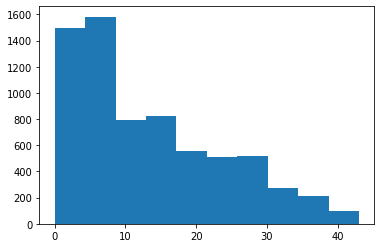

In [14]:
plt.hist(train['Time_of_service'])
plt.show()

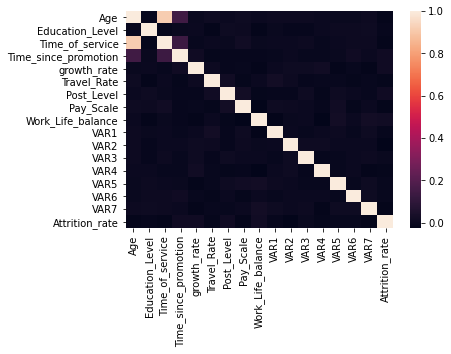

In [16]:
sns.heatmap(train.corr())
plt.show()

In [8]:
age=train.loc[train['Age'].isnull(),:]
tos=age.loc[age['Time_of_service'].isnull(),:]
tos.shape

(7, 24)

In [9]:
age.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,51,1,2,4.0,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571


In [26]:
np.mean(train['Time_of_service'])

13.385064177362894

In [0]:
a=train.loc[train['Time_of_service'].isnull(),:]
b=a.loc[a['Age'].isnull(),:]
indices=list(b.index)

In [0]:
for i in indices:
  train['Age'][i]=50

In [0]:
indices_new=list(a.index)
for i in indices_new:
  train['Time_of_service'][i]=train['Age'][i]-19

In [0]:
age=train.loc[train['Age'].isnull(),:]
indices_age=list(age.index)
for i in indices_age:
  train['Age'][i]=train['Time_of_service'][i]+19

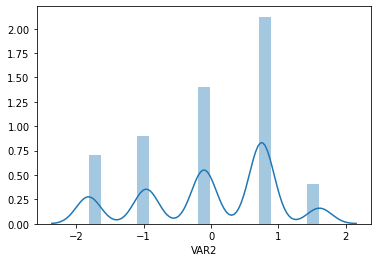

In [40]:
sns.distplot(train['VAR2'])
plt.show()

In [0]:
train.loc[train['VAR2'].isnull(),'VAR2']=np.mean(train['VAR2'])

In [42]:
train['VAR4'].value_counts()

2.0    4491
1.0    1272
3.0     581
Name: VAR4, dtype: int64

In [0]:
train.loc[train['VAR4'].isnull(),'VAR4']=2.0

In [45]:
train['Work_Life_balance'].value_counts()

1.0    2042
3.0    2023
2.0    1615
4.0    1197
5.0     112
Name: Work_Life_balance, dtype: int64

In [0]:
train.loc[train['Work_Life_balance'].isnull(),'Work_Life_balance']=2.0

In [76]:
train['Pay_Scale'].value_counts()

8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64

In [0]:
train.loc[train['Pay_Scale'].isnull(),'Pay_Scale']=8.0

In [78]:
train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [0]:
train_clean=train.copy()

In [51]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [54]:
print(train['Gender'].unique(),
      train['Relationship_Status'].unique(),
      train['Unit'].unique(),train['Decision_skill_possess'].unique(),
      train['Compensation_and_Benefits'].unique())

['F' 'M'] ['Married' 'Single'] ['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security'] ['Conceptual' 'Analytical' 'Behavioral' 'Directive'] ['type2' 'type3' 'type0' 'type4' 'type1']


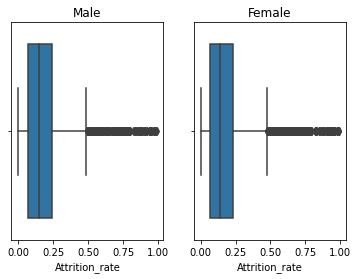

In [58]:
male=train.loc[train['Gender']=='M',:]
female=train.loc[train['Gender']=='F',:]
plt.subplot(1,2,1)
sns.boxplot(male['Attrition_rate'])
plt.title('Male')
plt.subplot(1,2,2)
sns.boxplot(female['Attrition_rate'])
plt.title('Female')
plt.show()

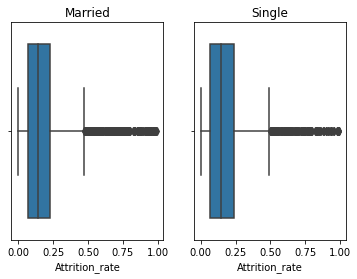

In [59]:
married=train.loc[train['Relationship_Status']=='Married',:]
single=train.loc[train['Relationship_Status']=='Single',:]
plt.subplot(1,2,1)
sns.boxplot(married['Attrition_rate'])
plt.title('Married')
plt.subplot(1,2,2)
sns.boxplot(single['Attrition_rate'])
plt.title('Single')
plt.show()

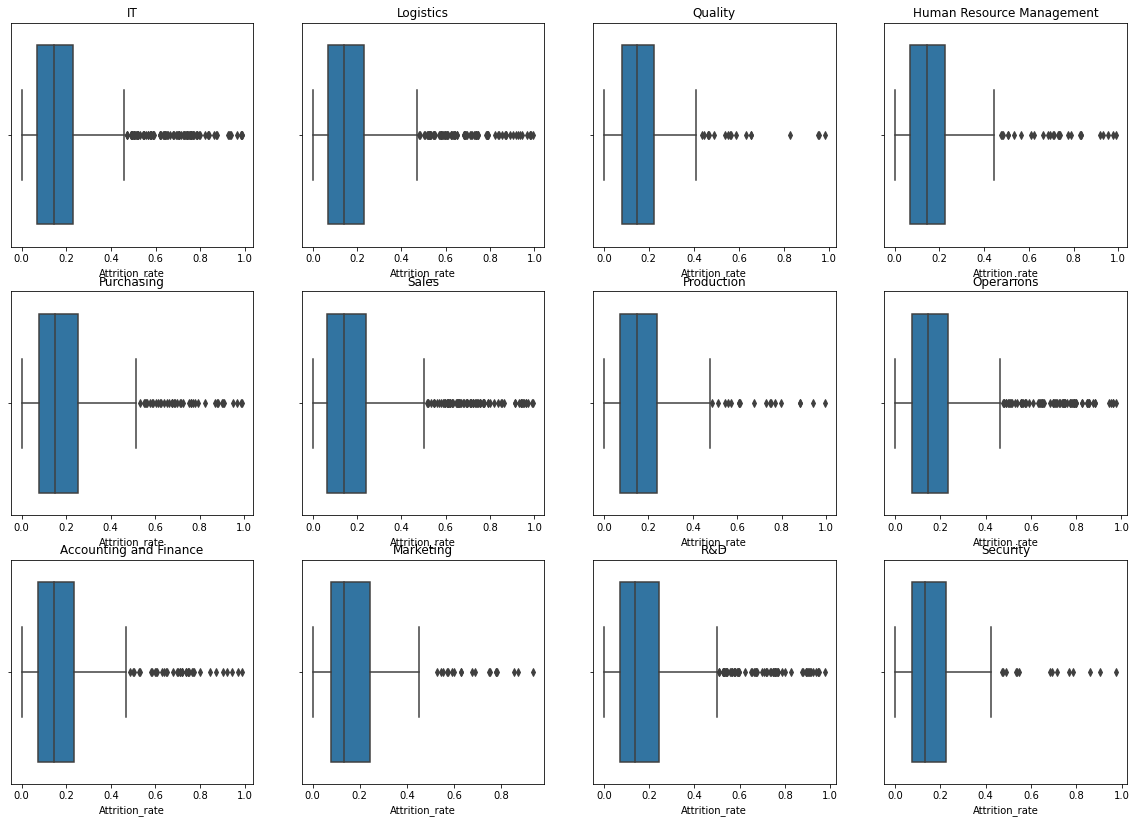

In [63]:
a=train['Unit'].unique()
plt.rcParams['figure.figsize']=20,14
for i in a:
  new=train.loc[train['Unit']==i,:]
  result=np.where(a==i)
  plt.subplot(3,4,result[0]+1)
  sns.boxplot(new['Attrition_rate'])
  plt.title(i)
plt.show()  

In [71]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [0]:
y=train['Attrition_rate']
x=train.drop(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
        'Work_Life_balance',
       'VAR7', 'Attrition_rate','Compensation_and_Benefits'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=7)
dt.fit(x_train,y_train)
predict=dt.predict(x_test)
print(100*max(0,1-sqrt(mean_squared_error(y_test,predict))))

80.8616607724959


In [108]:
from xgboost import XGBRegressor
from math import sqrt
xgb=XGBRegressor(learning_rate=0.03,max_depth=7,n_estimators=500,reg_lambda=1,gamma=3,min_child_weight=1)
xgb.fit(x_train,y_train)
predict=xgb.predict(x_test)
print(100*max(0,1-sqrt(mean_squared_error(y_test,predict))))

[07:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
81.59279787708417


In [94]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [0]:
test.loc[test['VAR4'].isnull(),'VAR4']=2.0

In [0]:
test.loc[test['Pay_Scale'].isnull(),'Pay_Scale']=8.0

In [0]:
test.loc[test['VAR2'].isnull(),'VAR2']=np.mean(test['VAR2'])

In [0]:
test.loc[test['Work_Life_balance'].isnull(),'Work_Life_balance']=2.0

In [0]:
a=test.loc[test['Time_of_service'].isnull(),:]
b=a.loc[a['Age'].isnull(),:]
indices=list(b.index)

In [0]:
for i in indices:
  test['Age'][i]=50

In [0]:
indices_new=list(a.index)
for i in indices_new:
  test['Time_of_service'][i]=test['Age'][i]-19

In [0]:
age=test.loc[test['Age'].isnull(),:]
indices_age=list(age.index)
for i in indices_age:
  test['Age'][i]=test['Time_of_service'][i]+19

In [103]:
test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [0]:
test_set=test.drop(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
        'Work_Life_balance',
       'VAR7','Compensation_and_Benefits'],axis=1)

In [0]:
predicted=xgb.predict(test_set)
results=pd.DataFrame({'Employee_ID':test['Employee_ID'],'Attrition_rate':predicted})

In [0]:
results.to_csv('attrition1.csv',index=False)